In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read csv file in
file_path = 'D:\\sentences_Lassy_Klein_no_filtering.csv'
df = pd.read_csv(file_path)

# Filtering for Verbs

In [4]:
# get the verbs from the different categories
oti_verbs = df[df['Category'] == 'oti']['Verb']
ti_verbs = df[df['Category'] == 'ti']['Verb']

# see which verbs are more than 10 times in oti and ti
oti_verb_count = {}
for v in oti_verbs:
    if v in oti_verb_count.keys():
        oti_verb_count[v] += 1
    else:
        oti_verb_count[v] = 1

ti_verb_count = {}
for v in ti_verbs:
    if v in ti_verb_count.keys():
        ti_verb_count[v] += 1
    else:
        ti_verb_count[v] = 1

verbs_tenplus_oti = []
for k in oti_verb_count:
    if oti_verb_count[k] > 10:
        verbs_tenplus_oti.append(k)
verbs_tenplus_ti = []
for k in ti_verb_count:
    if ti_verb_count[k] > 10:
        verbs_tenplus_ti.append(k)

verbs_tenplus_ti
        
verb_list = []
for verb in verbs_tenplus_oti:
    if verb in verbs_tenplus_ti:
        verb_list.append(verb)

In [5]:
# filter the verbs to only get verbs with optional 'om' construction
verb_list_filtered = [i for i in verb_list if i not in ['hebben', 'zijn', 'lijken', 'krijgen', 'maken', 'staan', 'beginnen', 'komen', 'blijken']]

In [6]:
df_filtered = df.loc[df['Verb'].isin(verb_list_filtered)]

# Removing Overlap Between Sentences

In [8]:
# checking overlap between oti and ti
filenames_overlap_oti_ti = []
for i in df_filtered[df_filtered['Category'] == 'oti']['Filename']:
    for j in df_filtered[df_filtered['Category'] == 'ti']['Filename']:
        if (i == j):
            filenames_overlap_oti_ti.append(i)

# delete from both categories by filtering on files that are not in the list
df_filtered = df_filtered[~df_filtered["Filename"].isin(filenames_overlap_oti_ti)] # ~ inverts the mask

In [9]:
# checking overlap between ti and niet + ti
filenames_overlap_ti_niet = []
for i in df_filtered[df_filtered['Category'] == 'ti']['Filename']:
    for j in df_filtered[df_filtered['Category'] == 'niet + ti']['Filename']:
        if (i == j):
            filenames_overlap_ti_niet.append(i)

# delete these filenames from 'ti' category
df_filtered = df_filtered[~((df_filtered['Category'] == 'ti') & (df_filtered["Filename"].isin(filenames_overlap_ti_niet)))] # ~ inverts the mask

In [10]:
# check overlap between oti and niet + ti
n = 0
for i in df_filtered[df_filtered['Category'] == 'oti']['Filename']:
    for j in df_filtered[df_filtered['Category'] == 'niet + ti']['Filename']:
        if (i == j):
            n += 1
print(n)

0


# Adding Sentence Length

In [13]:
# add Sentence Length column to dataframe with the length of the sentence
df_filtered = df_filtered.reset_index()
for i in range(df_filtered.shape[0]):
    df_filtered.loc[i, 'Sentence_length'] = len(df_filtered['Sentence'][i].split())

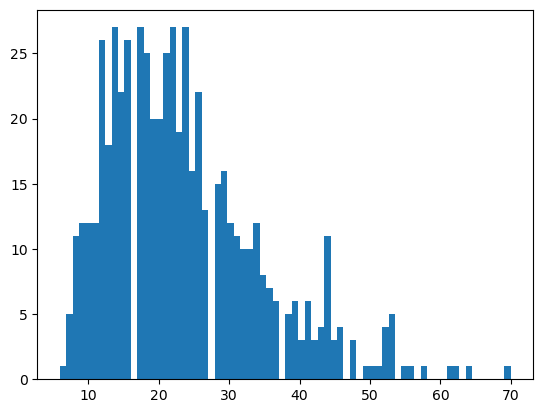

In [14]:
plt.hist(df_filtered['Sentence_length'], bins=int(max(df_filtered['Sentence_length'])))
# plt.savefig('sentence length.jpg')
plt.show()

In [33]:
# cutoff chosen based on histogram
cutoff = 20

# adding a short/long label to dataframe
df_filtered['Length Label'] = ['short' if x < cutoff else 'long' for x in df_filtered['Sentence_length']]

# Saving Filtered Sentences to CSV

In [42]:
df_filtered.to_csv("D:\\preprocessed_sentences_Lassy_Klein.csv")